# Assignment 15-Random Forest (Fraud Data)

### Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
#importing liabraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import accuracy_score as ac

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.shape

(600, 6)

In [7]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
df.loc[df["Taxable.Income"] <= 30000,"Taxable.Income1"]="Risky"
df.loc[df["Taxable.Income"] >= 30000,"Taxable.Income1"]="Good"
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
# find categorical variables in training data set

traincategorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(traincategorical)))

print('The categorical variables are :\n\n', traincategorical)

There are 4 categorical variables

The categorical variables are :

 ['Undergrad', 'Marital.Status', 'Urban', 'Taxable.Income1']


In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['Taxable.Income1']= label_encoder.fit_transform(df['Taxable.Income1']) 

In [11]:
def min_max_scaler(i):
    data= pd.DataFrame(i)
    df_norm=  (data-data.min())/(data.max()-data.min())
    return df_norm
df = min_max_scaler(df)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0


In [12]:
df.drop(['Taxable.Income'], axis=1, inplace=True)

In [13]:
#split the data into dependant and independant variable
X = df.iloc[:,0:5]
y = df['Taxable.Income1']


In [14]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [15]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable.Income1, Length: 600, dtype: float64

In [16]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.2)

In [17]:
#model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model=RandomForestClassifier(n_estimators=2,max_depth=2,max_features=3,random_state=40)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.base_estimator_.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
ac(y_test,y_pred)

0.825

[Text(685.6714864201571, 530.6571428571428, 'Work.Experience <= 0.817\ngini = 0.337\nsamples = 480\nvalue = [377, 103]\nclass = Good'),
 Text(417.4843340968587, 504.7714285714286, 'Work.Experience <= 0.55\ngini = 0.353\nsamples = 375\nvalue = [289, 86]\nclass = Good'),
 Text(78.67416557591623, 478.8857142857143, 'City.Population <= 0.989\ngini = 0.317\nsamples = 268\nvalue = [215, 53]\nclass = Good'),
 Text(66.98830170157068, 453.0, 'City.Population <= 0.006\ngini = 0.31\nsamples = 266\nvalue = [215, 51]\nclass = Good'),
 Text(23.3717277486911, 427.11428571428576, 'Undergrad <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Good'),
 Text(11.68586387434555, 401.22857142857146, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Good'),
 Text(35.05759162303665, 401.22857142857146, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Risky'),
 Text(110.60487565445027, 427.11428571428576, 'City.Population <= 0.052\ngini = 0.307\nsamples = 264\nvalue = [214, 50]\nclass = Good'),
 Text(58.

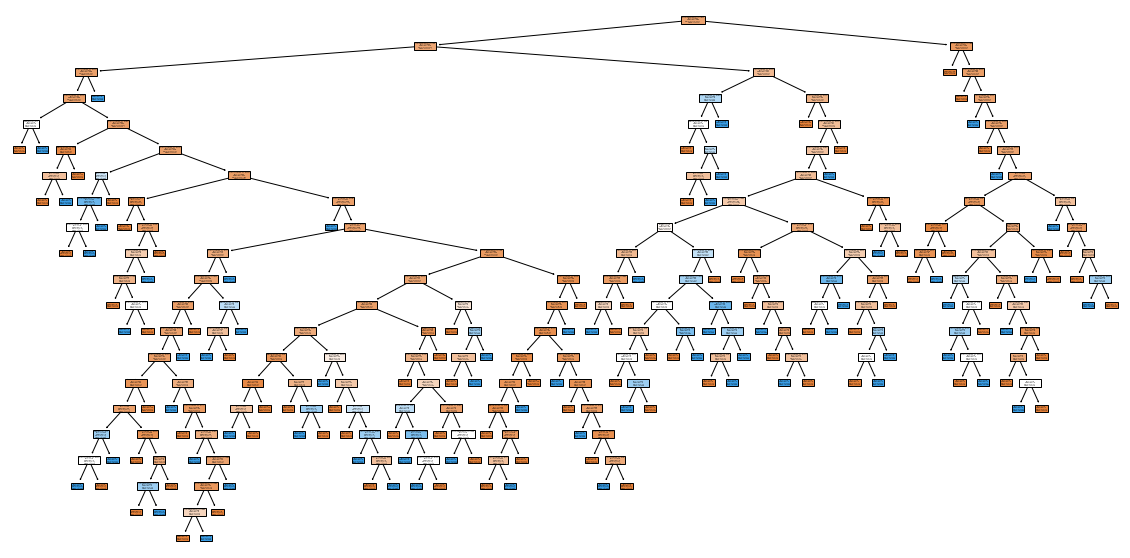

In [27]:
fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good','Risky']
plt.figure(figsize=(20,10))

tree.plot_tree(model.base_estimator_,feature_names=fn,class_names=cn,filled=True)

In [28]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    120
dtype: int64

In [29]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.825

In [30]:
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)

Confusion Matrix:
[[99 21]
 [ 0  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90       120
         1.0       0.00      0.00      0.00         0

    accuracy                           0.82       120
   macro avg       0.50      0.41      0.45       120
weighted avg       1.00      0.82      0.90       120

Accuracy: 0.825
